# Identify Key Aspects of a Review

## Pipline

- Import Necessary Dependencies
- Read and Load the Dataset
- Exploratory Data Analysis
- Data Preprocessing
- Transforming Dataset using Word2Vec technique
- Function for Model Evaluation
- Model Building
- Conclusion

E-commerce has revolutionized retail experience through multiple insights that it provides customers and retailers. Customer' reviews are considered as feedback by retailers about their product and services. These feedback allow them to understand the industry better and enhance the efficiency and quality of their product.

thorough analysis of a review can provide insights to retailers and E-commerce platforms about improvements that are required for better customer satisfaction. Analysis of such million reviews are handled by the E-commerce team manually and it is a very time-consuming task. This impacts the business of retailers as they get delayed feedback.

## Import Necessary Dependencies

In [1]:
import re
import numpy as np
import pandas as pd
import string
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.preprocessing import OneHotEncoder

from nltk.corpus import stopwords
import gensim
from gensim.models import Word2Vec
from skmultilearn.adapt import MLkNN
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

## Read and Load the Dataset

In [2]:
data_train = pd.read_csv('Dataset/train.csv')
data_test = pd.read_csv('Dataset/test.csv')
data_submission = pd.read_csv('Dataset/Sample_Submission.csv')
data_train.head(5)

,Review Text,Review Title,topic
0,"Did nothing for me, didn't help lost even with...",Useless,Shipment and delivery
1,"Did nothing for me, didn't help lost even with...",Useless,Not Effective
2,I have bought these bags and immediately open...,TRASH!!! Do not buy these bags it’s a waist of...,Customer Service
3,Gave me an allergic reaction on my face :(,Do not recommend,Allergic
4,These don't compare to the name brand wipes. F...,Can't tackle big messes,Texture


In [3]:
target = np.array(data_train['topic']).reshape(-1, 1)
encoder = OneHotEncoder(dtype = int).fit(target)
topics = encoder.categories_[0]
values = encoder.transform(target)

topic_encoded = pd.DataFrame(values.toarray(), columns=topics)

data_train.drop('topic',axis = 1,inplace=True)
data_train = pd.concat([data_train, topic_encoded],axis = 1)
data_train

,Review Text,Review Title,Allergic,Bad Taste/Flavor,Color and texture,Customer Issues,Customer Service,Didn't Like,Expiry,False Advertisement,...,Not Effective,Packaging,Pricing,Quality/Contaminated,Shipment and delivery,Smells Bad,Texture,Too Sweet,Too big to swallow,Wrong Product received
0,"Did nothing for me, didn't help lost even with...",Useless,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,"Did nothing for me, didn't help lost even with...",Useless,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,I have bought these bags and immediately open...,TRASH!!! Do not buy these bags it’s a waist of...,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Gave me an allergic reaction on my face :(,Do not recommend,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,These don't compare to the name brand wipes. F...,Can't tackle big messes,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5954,Total damage . The vitamin is melted on one si...,So disappointed,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5955,The pills smell awful and taste the same,They smell awful!,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5956,The pills smell awful and taste the same,They smell awful!,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5957,Stuff taste horrible,Nasty,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data_test.head(5)

,Review Text,Review Title
0,I use chia seed in my protein shakes. These ta...,Bad tast
1,I use chia seed in my protein shakes. These ta...,Bad tast
2,Don’t waste your money.,No change. No results.
3,I use the book 'Fortify Your Life' by Tieraona...,"Good Vegan Choice, Poor Non Vegan Choice"
4,I use the book 'Fortify Your Life' by Tieraona...,"Good Vegan Choice, Poor Non Vegan Choice"


## Data Preprocessing

- in this part of the project we are going to perform various pre-processing steps on the dataset that mainly convert the text into the lowercase for normalization.dealt with removing stopwords and ponctuations to reducing the unnecessary noise from the dataset.
- then we will perform Lemmatization for better results.

#### Deleting all the duplicates entries

- total number of duplicates entries
- Checking for Null values

In [5]:

print(data_train.duplicated().sum())

print(np.sum(data_train.isnull().any(axis=1)))



11
0


In [6]:

data_train.drop_duplicates(inplace=True)

In [7]:
# Convert to lowercase
data_train['Review Text'] =data_train['Review Text'].str.lower()
data_train['Review Title']=data_train['Review Title'].str.lower()
data_train.head()

,Review Text,Review Title,Allergic,Bad Taste/Flavor,Color and texture,Customer Issues,Customer Service,Didn't Like,Expiry,False Advertisement,...,Not Effective,Packaging,Pricing,Quality/Contaminated,Shipment and delivery,Smells Bad,Texture,Too Sweet,Too big to swallow,Wrong Product received
0,"did nothing for me, didn't help lost even with...",useless,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,"did nothing for me, didn't help lost even with...",useless,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,i have bought these bags and immediately open...,trash!!! do not buy these bags it’s a waist of...,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,gave me an allergic reaction on my face :(,do not recommend,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,these don't compare to the name brand wipes. f...,can't tackle big messes,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [8]:
# removing stopword
from sklearn.feature_extraction import text
my_stop_words = text.ENGLISH_STOP_WORDS
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in my_stop_words])


data_train['Review Text'] = data_train['Review Text'].apply(lambda text: cleaning_stopwords(text))
data_train['Review Title'] = data_train['Review Title'].apply(lambda text: cleaning_stopwords(text))
data_train.head()

,Review Text,Review Title,Allergic,Bad Taste/Flavor,Color and texture,Customer Issues,Customer Service,Didn't Like,Expiry,False Advertisement,...,Not Effective,Packaging,Pricing,Quality/Contaminated,Shipment and delivery,Smells Bad,Texture,Too Sweet,Too big to swallow,Wrong Product received
0,"did me, didn't help lost working eating health...",useless,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,"did me, didn't help lost working eating health...",useless,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,bought bags immediately open trash bag split s...,trash!!! buy bags it’s waist time!!!,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,gave allergic reaction face :(,recommend,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,don't compare brand wipes. family 5 little kid...,can't tackle big messes,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [9]:
# Applying Contarction
import contractions

def contraction(text):
    expanded_words = []   
    for word in text.split():
        # using contractions.fix to expand the shortened words
        expanded_words.append(contractions.fix(word))  
    expanded_text = ' '.join(expanded_words)
    return expanded_text

data_train['Review Text'] = data_train['Review Text'].apply(lambda text: contraction(text))
data_train['Review Title'] = data_train['Review Title'].apply(lambda text: contraction(text))
data_train.head()

,Review Text,Review Title,Allergic,Bad Taste/Flavor,Color and texture,Customer Issues,Customer Service,Didn't Like,Expiry,False Advertisement,...,Not Effective,Packaging,Pricing,Quality/Contaminated,Shipment and delivery,Smells Bad,Texture,Too Sweet,Too big to swallow,Wrong Product received
0,"did me, did not help lost working eating healt...",useless,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,"did me, did not help lost working eating healt...",useless,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,bought bags immediately open trash bag split s...,trash!!! buy bags it is waist time!!!,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,gave allergic reaction face :(,recommend,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,do not compare brand wipes. family 5 little ki...,cannot tackle big messes,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [10]:
#removing Ponctuations
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
data_train['Review Text'] = data_train['Review Text'].apply(lambda text: cleaning_punctuations(text))
data_train['Review Title'] = data_train['Review Title'].apply(lambda text: cleaning_punctuations(text))
data_train.head()

,Review Text,Review Title,Allergic,Bad Taste/Flavor,Color and texture,Customer Issues,Customer Service,Didn't Like,Expiry,False Advertisement,...,Not Effective,Packaging,Pricing,Quality/Contaminated,Shipment and delivery,Smells Bad,Texture,Too Sweet,Too big to swallow,Wrong Product received
0,did me did not help lost working eating health...,useless,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,did me did not help lost working eating health...,useless,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,bought bags immediately open trash bag split s...,trash buy bags it is waist time,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,gave allergic reaction face,recommend,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,do not compare brand wipes family 5 little kid...,cannot tackle big messes,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [11]:
# remove Emojis
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)
data_train['Review Text'] = data_train['Review Text'].apply(lambda text: deEmojify(text))
data_train['Review Title'] = data_train['Review Title'].apply(lambda text: deEmojify(text))
data_train.head()

,Review Text,Review Title,Allergic,Bad Taste/Flavor,Color and texture,Customer Issues,Customer Service,Didn't Like,Expiry,False Advertisement,...,Not Effective,Packaging,Pricing,Quality/Contaminated,Shipment and delivery,Smells Bad,Texture,Too Sweet,Too big to swallow,Wrong Product received
0,did me did not help lost working eating health...,useless,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,did me did not help lost working eating health...,useless,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,bought bags immediately open trash bag split s...,trash buy bags it is waist time,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,gave allergic reaction face,recommend,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,do not compare brand wipes family 5 little kid...,cannot tackle big messes,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [12]:
#removing Numbers
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
data_train['Review Text'] = data_train['Review Text'].apply(lambda text: cleaning_numbers(text))
data_train['Review Title'] = data_train['Review Title'].apply(lambda text: cleaning_numbers(text))
data_train.head()

,Review Text,Review Title,Allergic,Bad Taste/Flavor,Color and texture,Customer Issues,Customer Service,Didn't Like,Expiry,False Advertisement,...,Not Effective,Packaging,Pricing,Quality/Contaminated,Shipment and delivery,Smells Bad,Texture,Too Sweet,Too big to swallow,Wrong Product received
0,did me did not help lost working eating health...,useless,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,did me did not help lost working eating health...,useless,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,bought bags immediately open trash bag split s...,trash buy bags it is waist time,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,gave allergic reaction face,recommend,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,do not compare brand wipes family little kids...,cannot tackle big messes,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [13]:
def hundleDuplecateCells(data):
    df=data.groupby(['Review Text','Review Title']).sum()
    return df.reset_index()
d=hundleDuplecateCells(data_train)

In [14]:
d

,Review Text,Review Title,Allergic,Bad Taste/Flavor,Color and texture,Customer Issues,Customer Service,Didn't Like,Expiry,False Advertisement,...,Not Effective,Packaging,Pricing,Quality/Contaminated,Shipment and delivery,Smells Bad,Texture,Too Sweet,Too big to swallow,Wrong Product received
0,,quick delivery,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,alcohol it is worse tasting sweetener ever ta...,awful,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,bottles expired month ordered item bottles ex...,products expired arrival,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,cannot ship liquids,shipping disaster,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,capsules container broken paid capsules got...,consumer ripoff,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,zero stars would took weeks noticed differenc...,worst vitamins taken,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4205,zinc supplements beneficial number reasons use...,poor taste worse texture good way zinc,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4206,“ natural lemon flavor” vicious heartburn sta...,heartburn,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4207,“fresh scent”br unless like assaulted overpowe...,“fresh scent” misleading do not bother,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


### Exploratory Data Analysis

In [15]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Review Text              4209 non-null   object
 1   Review Title             4209 non-null   object
 2   Allergic                 4209 non-null   int32 
 3   Bad Taste/Flavor         4209 non-null   int32 
 4   Color and texture        4209 non-null   int32 
 5   Customer Issues          4209 non-null   int32 
 6   Customer Service         4209 non-null   int32 
 7   Didn't Like              4209 non-null   int32 
 8   Expiry                   4209 non-null   int32 
 9   False Advertisement      4209 non-null   int32 
 10  Hard to Chew             4209 non-null   int32 
 11  Inferior to competitors  4209 non-null   int32 
 12  Ingredients              4209 non-null   int32 
 13  Not Effective            4209 non-null   int32 
 14  Packaging                4209 non-null  

#### Extracting all of the categories of topics trom the target column

In [16]:

df_review = d.drop(['Review Text','Review Title'], axis=1)
counts = []
categories = list(df_review.columns.values)
for i in categories:
    counts.append((i, df_review[i].sum()))
df_stats = pd.DataFrame(counts, columns=['topic', 'number_of_reviews'])
df_stats

,topic,number_of_reviews
0,Allergic,567
1,Bad Taste/Flavor,1193
2,Color and texture,233
3,Customer Issues,8
4,Customer Service,239
5,Didn't Like,31
6,Expiry,135
7,False Advertisement,37
8,Hard to Chew,6
9,Inferior to competitors,44


#### Plotting the distribution of the reviews over topics in the dataset

<AxesSubplot:title={'center':'Reviews Count per topic'}, xlabel='number_of_reviews', ylabel='topic'>

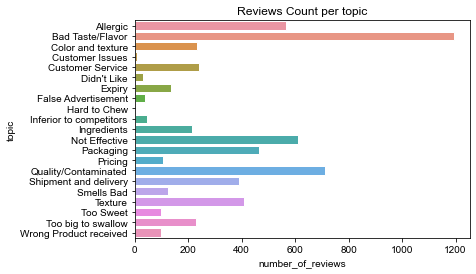

In [17]:
plt.title('Reviews Count per topic')
sns.set( rc = {'figure.figsize' : ( 5, 5 ), 
               'axes.labelsize' : 5})
sns.barplot(x='number_of_reviews',y='topic', data=df_stats)

- Analysis Insights

The bar chart illustrate the counts of reviews of each topic. 
The graph shows that the biggest number of reviews are about about <b> Bad Tast/Flavor </b>, <b>Quality/Contaminated</b> and <b>Not Effective </b> got a big number of reviews. However, the number of reviews with<b> Hard to Chew </b> Topic concerns is very low as well as <b>Customer issues </b>.

#### Plotting the Review text length 

In [18]:
word_count = d['Review Text'].astype(str).apply(len)
df = word_count.to_frame()
df.rename(columns = {'Review Text':'Review Text Length'}, inplace = True)

array([[<AxesSubplot:title={'center':'Review Text Length'}>]],
      dtype=object)

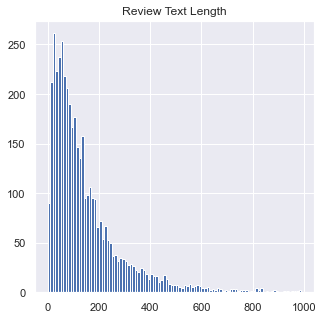

In [19]:
df.hist(bins = np.arange(0,1000,10))

- Analysis Insights

The chart illustrate the  of review text in terms of Text Length. 
The graph shows that <b>the majority</b> of reviews are between 0 and 400 long

#### 


#### Visualizing reviews with multipe topics

C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'number of topics')

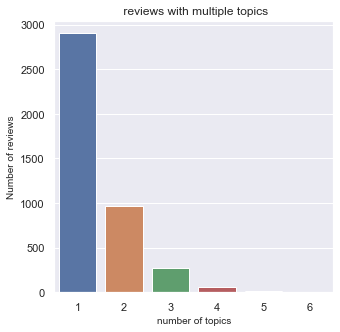

In [20]:
z=d.iloc[:,2:].sum(axis=1).value_counts()
plt.figure(figsize=(5,5))
ax = sns.barplot(z.index, z.values)
plt.title(" reviews with multiple topics")
plt.ylabel('Number of reviews', fontsize=10)
plt.xlabel('number of topics', fontsize=10)

- Analysis Insights

The ber chart categorizes reviews according to number of topics. 
The graph shows that <b>the larger part</b> of reviews have only <b>one</b> topic, a great number of reviews contain two or three topics.

#### 

#### The WordCloud illustrates the Commun words used per topic 



In [21]:
# function to combine the Review Text of each topic
def fun(data):
    df_review = d.drop(['Review Text','Review Title'], axis=1)
    Texts = []
    categories = list(df_review.columns.values)
    for i in categories:
        df=data.groupby([i])['Review Text'].apply(lambda x: " ".join(x)).reset_index()
        Texts.append(str(df[df[i]==1]['Review Text'].values))
    return Texts
s=fun(d)

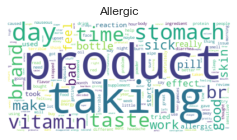

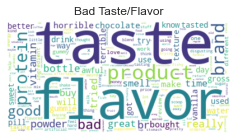

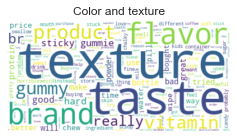

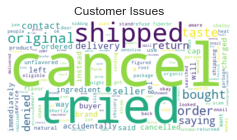

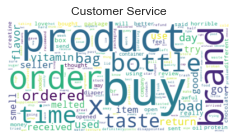

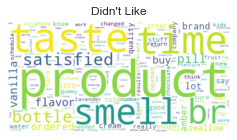

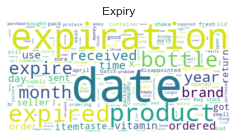

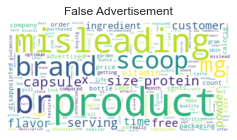

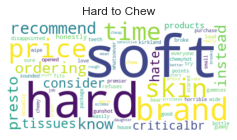

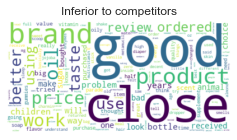

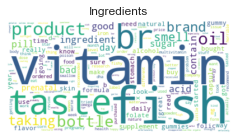

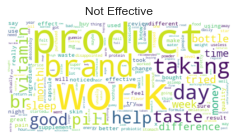

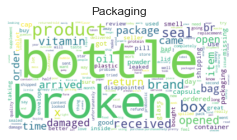

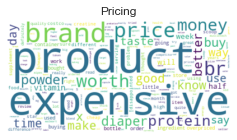

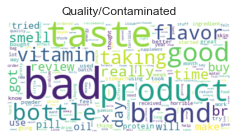

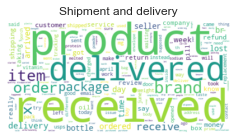

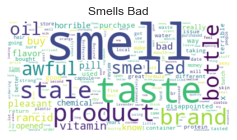

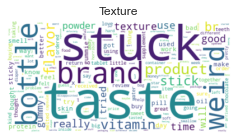

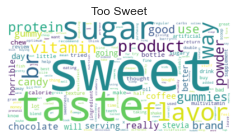

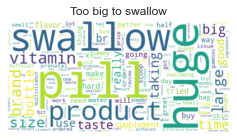

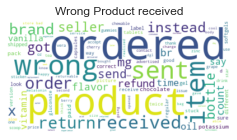

In [22]:
# plotting the Word Cloud of each topic 

f_review = d.drop(['Review Text','Review Title'], axis=1)
categories = list(df_review.columns.values)
for j, c in zip(s, categories):
    wordcloud = WordCloud(collocations = False, background_color = 'white').generate(j)
    plt.figure(figsize = (4, 4), facecolor = None)
    plt.title(c)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    

## Transforming Dataset using Word2Vec technique

In [24]:
y= np.array(d[d.columns[2:]])
y.shape

(4209, 21)

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfVectorizer=TfidfVectorizer()

X1=d['Review Text']

tfidfvector1=tfidfVectorizer.fit(X1)


X2=d['Review Title']

tfidfvector2=tfidfVectorizer.fit(X2)

X_trainp1, X_testp1, y_train, y_test= train_test_split(X1, y, test_size=0.2, random_state=5)
X_trainp2, X_testp2, y_train, y_test= train_test_split(X2, y, test_size=0.2, random_state=5)

  
X_train_tfidfp1 = tfidfvector1.transform(X_trainp1)
X_test_tfidfp1 = tfidfvector1.transform(X_testp1)

X_train_tfidfp2 = tfidfvector1.transform(X_trainp2)
X_test_tfidfp2 = tfidfvector1.transform(X_testp2)

print(X_test_tfidfp2)

  (0, 2048)	0.9085398139322106
  (0, 1557)	0.4177982844627587
  (1, 2105)	0.3718692568138599
  (1, 2044)	0.4725877111853458
  (1, 1190)	0.401529488490619
  (1, 813)	0.50379463691306
  (1, 3)	0.4725877111853458
  (2, 2164)	0.6377931374573155
  (2, 764)	0.322535856056911
  (2, 339)	0.4892632240003906
  (2, 311)	0.49981199766585555
  (3, 1557)	0.49975773911122323
  (3, 1203)	0.8661652280012391
  (4, 1589)	1.0
  (5, 334)	1.0
  (6, 2286)	0.5417661417991042
  (6, 2255)	0.4198005761443955
  (6, 1198)	0.4865658963275782
  (6, 428)	0.5417661417991042
  (7, 49)	1.0
  (8, 2256)	0.4051195438839356
  (8, 2055)	0.24795818006332315
  (8, 1848)	0.5272383645418224
  (8, 1627)	0.49520488577742994
  (8, 1368)	0.24046097978304615
  :	:
  (833, 2179)	0.7923479601493904
  (833, 1122)	0.6100694305135278
  (834, 985)	0.7779242143012153
  (834, 867)	0.3803503967693461
  (834, 212)	0.5001674644369003
  (835, 1143)	0.7573900038018243
  (835, 203)	0.6529627724005961
  (836, 1368)	0.33044422178813176
  (836, 1294)

In [ ]:
X_train_tfidf=
X_test_tfidf

## Function for Model Evaluation

In [29]:
X_test_tfidfp2.shape

(842, 2370)

In [30]:
import sklearn.metrics as metrics
import scikitplot.plotters as skplt

def train_model(classifier,feature_vector_train, label, feature_vector_valid, valid_y):
    
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the top n labels on validation dataset
    n = 5
    classifier.probability = True
    probas = classifier.predict_proba(feature_vector_valid)
    pred = classifier.predict(feature_vector_valid)
    predictions=np.argmax(pred, axis=1)
    valid_y = np.argmax(valid_y, axis=1)
    #Identify the indexes of the top predictions
    print(metrics.accuracy_score(valid_y, predictions))
    skplt.plot_confusion_matrix(valid_y, predictions)

#     print(f1_score(y_true=valid_y, y_pred=predictions, average='samples'))
#     print(accuracy_score(valid_y, predictions))
#     print(classification_report(valid_y, predictions))   


## Model Building

In [28]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import f1_score,accuracy_score,classification_report
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=13)
# clf_entropy = DecisionTreeClassifier(
#             criterion = "gini", random_state = 100,
#             max_depth = 10, min_samples_leaf = 5)

train_model(neigh,X_train_tfidf1,y_train, X_test_tfidf1, y_test)

NameError: name 'X_train_tfidf1' is not defined

## Conclusion